<>:84: SyntaxWarning: invalid escape sequence '\P'
<>:84: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_3702/1409912792.py:84: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('$\Psi(x, t=0)$')
/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


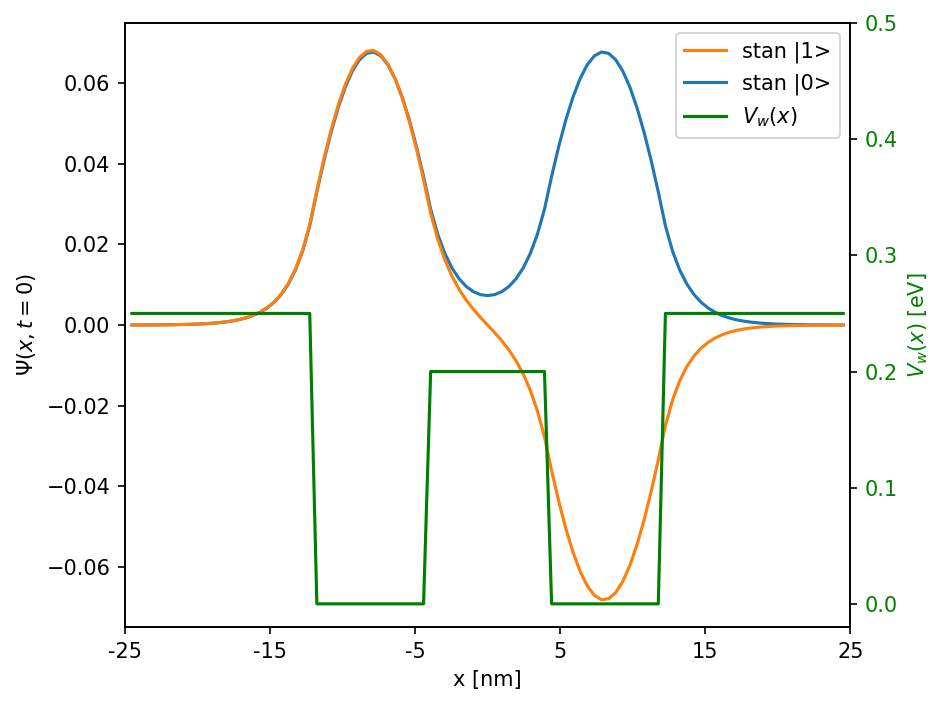

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import eigh
# import numba as nb

E_H = 27.211
ENERGY_CONVERSION = E_H * 1000
DISTANCE_CONVERSION = .05292
F_CONVERSION = E_H / DISTANCE_CONVERSION / 1e-4
# [nm] -> [au] x / conversion
# [au] -> [nm] x * conversion
# [meV] -> [au] e / conversion
# [au] -> [meV] e * conversion
# [kV/cm] -> [au] F / conversion
# [au] -> [kV/cm] F * conversion

n = 101
mass = 0.067
a = 25 / DISTANCE_CONVERSION # [nm] -> [au]
d1 = 12 / DISTANCE_CONVERSION # [nm] -> [au]
d2 = 4 / DISTANCE_CONVERSION # [nm] -> [au]
V1 = 250 / ENERGY_CONVERSION # [meV] -> [au]
V2 = 200 / ENERGY_CONVERSION # [meV] -> [au]
dx = 2*a / (n+1)
alpha = 1/(2*mass*dx**2)

F = 0 / F_CONVERSION

# make lookup tables instead of functions
xi = [-a + dx*(i+1) for i in np.arange(n)]
V_w = [0.0] * n
for i in range(n):
    if xi[i] < -d1:
        V_w[i] = V1
        continue
    if xi[i] >= -d2 and xi[i] <= d2:
        V_w[i] = V2
        continue
    if xi[i] > d1:
        V_w[i] = V1

V = lambda _i, _tm = 0 : V_w[_i] + F * xi[_i]

def applyHop(_Psi, _tm = 0):
    _psi_new = np.zeros(_Psi.size) + 0j
    _psi_new[0] = -alpha*(_Psi[1]-2*_Psi[0]) + V(0, _tm)*_Psi[0]
    _psi_new[-1] = -alpha*(_Psi[-2]-2*_Psi[-1]) + V(-1, _tm)*_Psi[-1]
    for i in range(1, n-1):
        _psi_new[i] = -alpha*(_Psi[i+1]+_Psi[i-1]-2*_Psi[i]) + V(i, _tm)*_Psi[i]
    return _psi_new

def Norm1D(_psi):
    return _psi / np.sqrt(np.sum(abs(_psi)**2)*dx)

H_mat = np.zeros((n,n))
for i in range(n):
    # diagonal
    H_mat[i,i] = 2*alpha + V_w[i]
    # above and under diagonal
    if (i > 0):
        H_mat[i-1,i] = -alpha
        H_mat[i,i-1] = -alpha

eigvals, eigvecs = eigh(H_mat)
Psi_base = eigvecs[:,0].T.copy() + 0.0j
# obliczenia pierwszego stanu t_0 - Crank-Nicolson

dt = 1
m = 0
tm = dt * m
Psi_k = Psi_base.copy()
Psi_prim = np.zeros(n) + 0.0j
for j in range(10):
    Psi_prim = applyHop(Psi_base, tm) + applyHop(Psi_k, tm+dt)
    for i in range(n):
        Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]

plt.figure(dpi=150)
# plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], [V(i)*ENERGY_CONVERSION/250/10 for i in range(n)])
ln2 = plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], Norm1D(Psi_k), label='stan |0>')
ln1 = plt.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], Norm1D(eigvecs[:,1]), label='stan |1>')
plt.xlabel('x [nm]')
plt.ylabel('$\Psi(x, t=0)$')
ax = plt.gca()
axr = ax.twinx()
axr.set_ylabel('$V_w(x)$ [eV]', color='g')
ln3 = axr.plot([xi[i]*DISTANCE_CONVERSION for i in range(n)], [V(i)*ENERGY_CONVERSION/1000 for i in range(n)], label='$V_w(x)$', color='g')
axr.tick_params(axis='y', labelcolor='g')
axr.set_ylim((-0.02, 0.5))
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)
plt.xlim(-a*DISTANCE_CONVERSION, a*DISTANCE_CONVERSION)
plt.xticks(np.linspace(-a,a,6)*DISTANCE_CONVERSION,[f'{val:.0f}' for val in np.linspace(-a,a,6)*DISTANCE_CONVERSION])
plt.tight_layout()
plt.savefig('zad2.png')
plt.show()

File = open('zad2_stan0.txt', 'w')
File1 = open('zad2_stan1.txt', 'w')
for i in range(len(eigvecs[:,0])):
    File.write(f'{eigvecs[i,0]}\n')
    File1.write(f'{eigvecs[i,1]}\n')
File.close()
File1.close()

# Zadanie 1

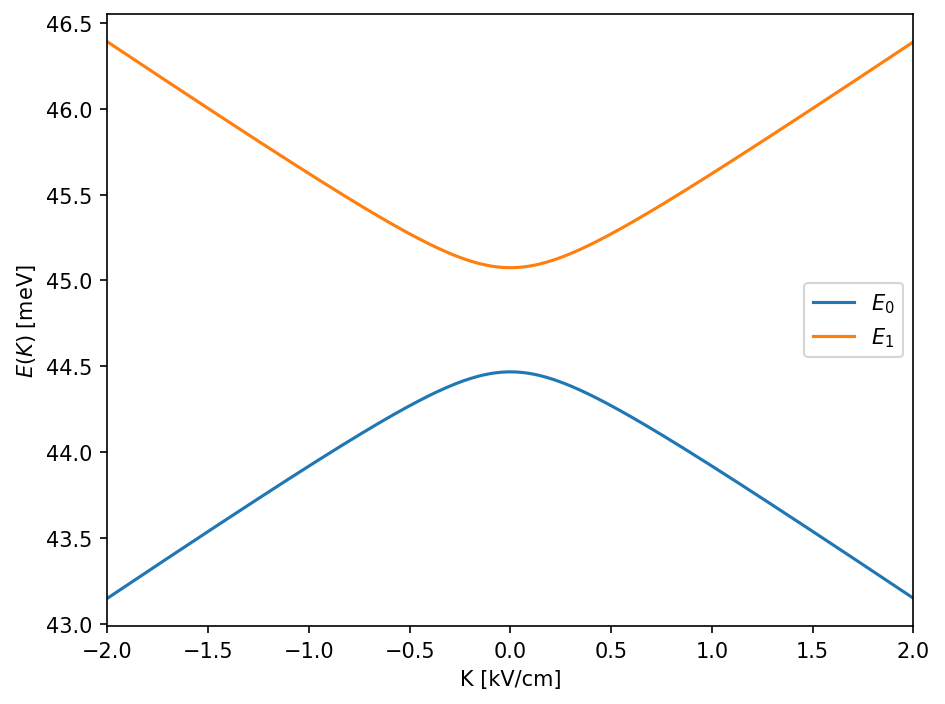

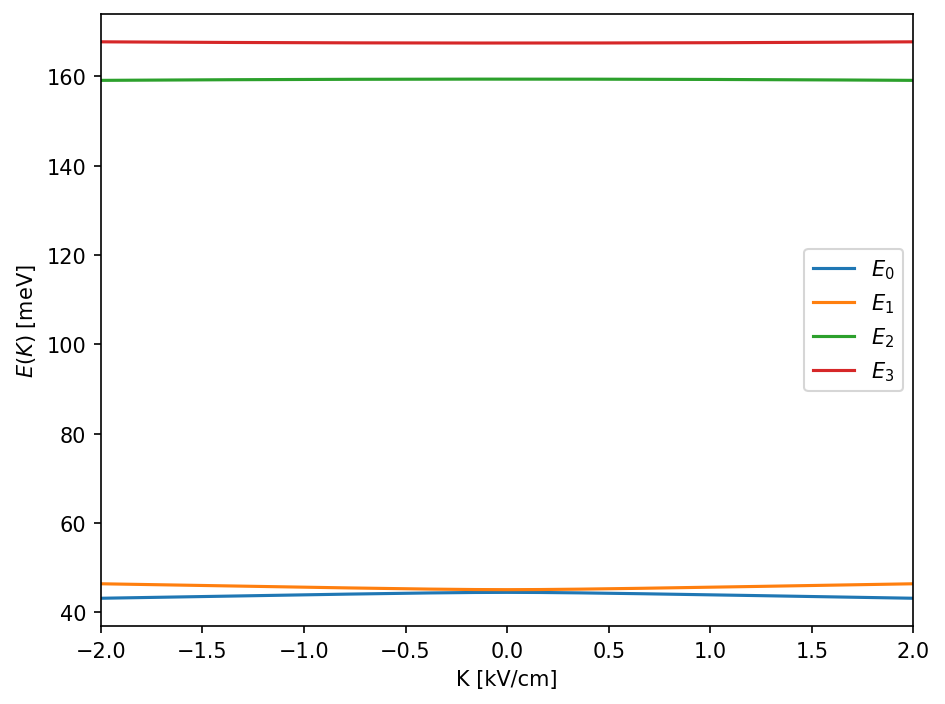

0.6072717778399102


In [57]:
from scipy.linalg import eigh
energies = [[],[],[],[]]
F_linspace = np.linspace(-2, 2, 201)/F_CONVERSION
for F in F_linspace:
    H_mat = np.zeros((n,n))
    for i in range(n):
        # diagonal
        H_mat[i,i] = 2*alpha + V_w[i] + F*xi[i]
        # above and under diagonal
        if (i > 0):
            H_mat[i-1,i] = -alpha
            H_mat[i,i-1] = -alpha

    eigvals, eigvecs = eigh(H_mat)
    for i in range(4):
        energies[i].append(eigvals[i])

plt.figure(dpi=150)
plt.plot(F_linspace*F_CONVERSION, np.array(energies[0])*ENERGY_CONVERSION, label='$E_0$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[1])*ENERGY_CONVERSION, label='$E_1$')
plt.ylabel('$E(K)$ [meV]')
plt.xlabel('K [kV/cm]')
plt.legend()
plt.xlim(-2, 2)
plt.tight_layout()
plt.savefig('zad1_01.png')
plt.show()

plt.figure(dpi=150)
plt.plot(F_linspace*F_CONVERSION, np.array(energies[0])*ENERGY_CONVERSION, label='$E_0$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[1])*ENERGY_CONVERSION, label='$E_1$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[2])*ENERGY_CONVERSION, label='$E_2$')
plt.plot(F_linspace*F_CONVERSION, np.array(energies[3])*ENERGY_CONVERSION, label='$E_3$')
plt.ylabel('$E(K)$ [meV]')
plt.xlabel('K [kV/cm]')
plt.legend()
plt.xlim(-2, 2)
plt.tight_layout()
plt.savefig('zad1_0123.png')
plt.show()
print((energies[1][100]-energies[0][100])*ENERGY_CONVERSION)

In [58]:
print(f'dE = {(energies[1][100]-energies[0][100])*ENERGY_CONVERSION:.5f} [meV]')

dE = 0.60727 [meV]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import eigh
# import numba as nb

E_H = 27.211
ENERGY_CONVERSION = E_H * 1000
DISTANCE_CONVERSION = .05292
F_CONVERSION = E_H / DISTANCE_CONVERSION / 1e-4
TIME_CONVERSION = 2.418884 * 1e-17

n = 101
mass = 0.067
a = 25 / DISTANCE_CONVERSION # [nm] -> [au]
d1 = 12 / DISTANCE_CONVERSION # [nm] -> [au]
d2 = 4 / DISTANCE_CONVERSION # [nm] -> [au]
V1 = 250 / ENERGY_CONVERSION # [meV] -> [au]
V2 = 200 / ENERGY_CONVERSION # [meV] -> [au]
F = 0.08 / F_CONVERSION
dx = 2*a / (n+1)
alpha = 1/(2*mass*dx**2)

dE = 0.6072717778399102 / ENERGY_CONVERSION
# omega = 95 * 1e-7 * 2.418884
omega = dE / 1 # h

# make lookup tables instead of functions
xi = [-a + dx*(i+1) for i in np.arange(n)]
V_w = [0.0] * n
for i in range(n):
    if xi[i] < -d1:
        V_w[i] = V1
        continue
    if xi[i] >= -d2 and xi[i] <= d2:
        V_w[i] = V2
        continue
    if xi[i] > d1:
        V_w[i] = V1

V = lambda _i, _tm = 0 : V_w[_i] + F * xi[_i] * math.sin(omega*_tm)

def HPsi(_Psi, _t):
    sin = math.sin(omega*_t)
    psi = np.zeros(n)+0j
    psi[0] = -alpha*(_Psi[1]-2*_Psi[0]) + (V_w[0] + F*xi[0]*sin)*_Psi[0]
    psi[-1] = -alpha*(_Psi[-2]-2*_Psi[-1]) + (V_w[-1] + F*xi[-1]*sin)*_Psi[-1]
    for i in range(1, n-1):
       psi[i] = -alpha*(_Psi[i+1]+_Psi[i-1]-2*_Psi[i]) + (V_w[i] + F*xi[i]*sin)*_Psi[i]
    return psi

def Norm1D(_psi):
    return _psi / np.sqrt(np.sum(abs(_psi)**2)*dx)

H_mat = np.zeros((n,n))
for i in range(n):
    # diagonal
    H_mat[i,i] = 2*alpha + V_w[i]
    # above and under diagonal
    if (i > 0):
        H_mat[i-1,i] = -alpha
        H_mat[i,i-1] = -alpha

eigvals, eigvecs = eigh(H_mat)
Psi_base = eigvecs[:,0].T.copy() + 0.0j
# obliczenia pierwszego stanu t_0 - Crank-Nicolson
Psi_base = Norm1D(Psi_base)
Psi_base_1 = Norm1D(eigvecs[:,1].T)

dt = 1 #  * TIME_CONVERSION * 5e7
m = 0
tm = dt * m
Psi_k = Psi_base.copy()
Psi_prim = np.zeros(n) + 0.0j
for j in range(10):
    Psi_prim = HPsi(Psi_base, tm) + HPsi(Psi_k, tm+dt)
    for i in range(n):
        Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]

Psi_tm_minus1 = Psi_base.copy()
Psi_tm_0 = Psi_k.copy()
time_steps = 3e6
def AskaraCakmak(psi_m_1, psi_0, _t):
    return psi_m_1 + 2*dt/(1j)*HPsi(psi_0, _t)

psi_tn_0 = []
psi_tn_1 = []
for i in range(int(time_steps)):
    Psi_tm_plus1 = AskaraCakmak(Psi_tm_minus1, Psi_tm_0, dt*(i+2))
    Psi_tm_minus1 = Psi_tm_0
    Psi_tm_0 = Psi_tm_plus1
    
    if (i % 10000) == 0:
        psi_tn_0.append(abs(np.sum(np.conjugate(Psi_tm_plus1)*Psi_base)*dx)**2)
        psi_tn_1.append(abs(np.sum(np.conjugate(Psi_tm_plus1)*Psi_base_1)*dx)**2)
        print(f'{i}/{time_steps} | {i/time_steps*100:.2f}%', end='\r')
            
print(f'{i}/{time_steps} | {i/time_steps*100:.2f}%')

2999999/3000000.0 | 100.00%


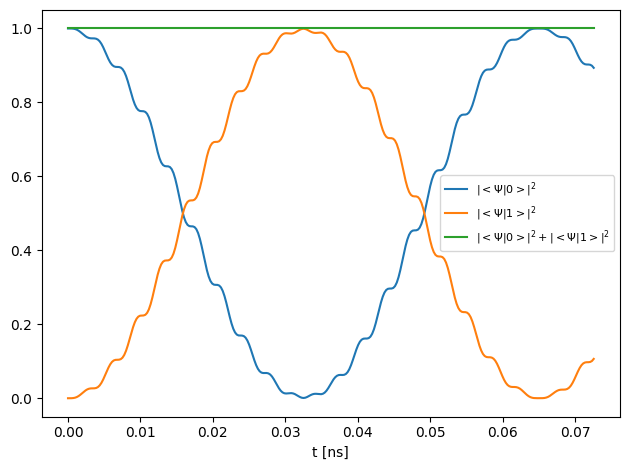

In [33]:
plt.plot(np.linspace(0, 3e6*1e9*TIME_CONVERSION, len(psi_tn_0)), np.array(psi_tn_0), label='$|<\Psi|0>|^2$')
plt.plot(np.linspace(0, 3e6*1e9*TIME_CONVERSION, len(psi_tn_0)), np.array(psi_tn_1), label='$|<\Psi|1>|^2$')
plt.plot(np.linspace(0, 3e6*1e9*TIME_CONVERSION, len(psi_tn_0)), np.array(psi_tn_1)+np.array(psi_tn_0), label='$|<\Psi|0>|^2+|<\Psi|1>|^2$')
plt.xlabel('t [ns]')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('zad3.png')
plt.show()

# Zadanie 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import eigh
# import numba as nb

E_H = 27.211
ENERGY_CONVERSION = E_H * 1000
DISTANCE_CONVERSION = .05292
F_CONVERSION = E_H / DISTANCE_CONVERSION / 1e-4
TIME_CONVERSION = 2.418884 * 1e-17

n = 101
mass = 0.067
a = 25 / DISTANCE_CONVERSION # [nm] -> [au]
d1 = 12 / DISTANCE_CONVERSION # [nm] -> [au]
d2 = 4 / DISTANCE_CONVERSION # [nm] -> [au]
V1 = 250 / ENERGY_CONVERSION # [meV] -> [au]
V2 = 200 / ENERGY_CONVERSION # [meV] -> [au]
dx = 2*a / (n+1)
alpha = 1/(2*mass*dx**2)

dE = 0.6072717778399102 / ENERGY_CONVERSION
# omega = 95 * 1e-7 * 2.418884
omega = dE / 1 # h

# make lookup tables instead of functions
xi = [-a + dx*(i+1) for i in np.arange(n)]
V_w = [0.0] * n
for i in range(n):
    if xi[i] < -d1:
        V_w[i] = V1
        continue
    if xi[i] >= -d2 and xi[i] <= d2:
        V_w[i] = V2
        continue
    if xi[i] > d1:
        V_w[i] = V1

temp_psi = np.zeros(n)+0j
prob = []
for F in np.linspace(0, 0.2, 20)/F_CONVERSION:# = 0.08 / F_CONVERSION
    V = lambda _i, _tm = 0 : V_w[_i] + F * xi[_i] * math.sin(omega*_tm)

    def HPsi(_Psi, _t):
        sin = math.sin(omega*_t)
        psi = np.zeros(n)+0j
        psi[0] = -alpha*(_Psi[1]-2*_Psi[0]) + (V_w[0] + F*xi[0]*sin)*_Psi[0]
        psi[-1] = -alpha*(_Psi[-2]-2*_Psi[-1]) + (V_w[-1] + F*xi[-1]*sin)*_Psi[-1]
        for i in range(1, n-1):
            psi[i] = -alpha*(_Psi[i+1]+_Psi[i-1]-2*_Psi[i]) + (V_w[i] + F*xi[i]*sin)*_Psi[i]
        return psi

    def Norm1D(_psi):
        return _psi / np.sqrt(np.sum(abs(_psi)**2)*dx)

    H_mat = np.zeros((n,n))
    for i in range(n):
        # diagonal
        H_mat[i,i] = 2*alpha + V_w[i]
        # above and under diagonal
        if (i > 0):
            H_mat[i-1,i] = -alpha
            H_mat[i,i-1] = -alpha

    eigvals, eigvecs = eigh(H_mat)
    Psi_base = eigvecs[:,0].T.copy() + 0.0j
    # obliczenia pierwszego stanu t_0 - Crank-Nicolson
    Psi_base = Norm1D(Psi_base)
    Psi_base_1 = Norm1D(eigvecs[:,1].T)

    dt = 1 #  * TIME_CONVERSION * 5e7
    m = 0
    tm = dt * m
    Psi_k = Psi_base.copy()
    Psi_prim = np.zeros(n) + 0.0j
    for j in range(10):
        Psi_prim = HPsi(Psi_base, tm) + HPsi(Psi_k, tm+dt)
        for i in range(n):
            Psi_k[i] = Psi_base[i] + dt / (2.0j) * Psi_prim[i]

    Psi_tm_minus1 = Psi_base.copy()
    Psi_tm_0 = Psi_k.copy()
    time_steps = 3e6
    def AskaraCakmak(psi_m_1, psi_0, _t):
        return psi_m_1 + 2*dt/(1j)*HPsi(psi_0, _t)

    psi_tn_1 = []
    for i in range(int(time_steps)):
        Psi_tm_plus1 = AskaraCakmak(Psi_tm_minus1, Psi_tm_0, dt*(i+2))
        Psi_tm_minus1 = Psi_tm_0
        Psi_tm_0 = Psi_tm_plus1
        
        if (i % 10000) == 0:
            psi_tn_1.append(abs(np.sum(np.conjugate(Psi_tm_plus1)*Psi_base_1)*dx)**2)
            print(f'{i}/{time_steps} | {i/time_steps*100:.2f}%', end='\r')
                
    print(f'{i}/{time_steps} | {i/time_steps*100:.2f}%')
    prob.append(psi_tn_1)
prob = np.array(prob)
np.save('zad4_map.npy', prob)